# Yelp Business EDA 

## Imports 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from textblob import TextBlob

## Data Import 

In [3]:
# Load the preprocessed data
restaurant = pd.read_csv('../data/restaurants_w_reviews.csv')

/var/folders/mc/nc2p69nn6ndg77rgmkqn55yr0000gn/T/ipykernel_98379/925555621.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  restaurant = pd.read_csv('../data/restaurants_w_reviews.csv')


In [4]:
# Filter out closed restaurants
restaurant = restaurant[restaurant['is_open'] == 1]

# Filter out restaurants with less than 50 reviews
restaurant = restaurant[restaurant['review_count'] >= 50]

In [9]:
# Filter out low-rated restaurants
restaurant = restaurant.drop('Unnamed: 0', axis=1)
restaurant = restaurant.rename(columns={'stars_x': 'business_star', 'stars_y': 'review_star'})
restaurant = restaurant[restaurant['business_star'] >= 2.0]

In [11]:
# Basic statistics for numerical columns
print(restaurant[['business_star', 'review_star']].describe())

       business_star   review_star
count   3.350155e+06  3.350155e+06
mean    3.895740e+00  3.896482e+00
std     5.309009e-01  1.338043e+00
min     2.000000e+00  1.000000e+00
25%     3.500000e+00  3.000000e+00
50%     4.000000e+00  4.000000e+00
75%     4.500000e+00  5.000000e+00
max     5.000000e+00  5.000000e+00


In [13]:
restaurant.isnull().sum()

business_id          0
name                 0
address           2535
city                 0
state                0
postal_code          0
latitude             0
longitude            0
business_star        0
review_count         0
is_open              0
attributes          63
categories           0
hours            28367
review_id            0
user_id              0
review_star          0
useful               0
funny                0
cool                 0
text                 0
date                 1
dtype: int64

## Add Sentiment 


In [22]:
def sentiment_analysis(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# EDA

## Distrbution of Data 

The skewness of the 'business_stars' and 'review_count' columns suggests that the data is not evenly distributed and may not be normally distributed, which can impact the performance of the SVD model. Specifically, if the data is not normally distributed, it can result in biased and inaccurate recommendations.

The skewness towards the right for 'business_stars' suggests that most businesses are rated highly by users, while the skewness towards the left for 'review_count' suggests that most businesses have a low number of reviews. This information can help inform the SVD model by indicating that businesses with a higher number of reviews may have more accurate ratings than businesses with only a few reviews. Therefore, it may be useful to weigh businesses with a higher number of reviews more heavily in the recommendation engine.

One way to weigh businesses with higher reviews more heavily in the SVD model is to give more weight to the user-item interactions that involve those businesses. One approach to achieve this is to use a weighted matrix factorization algorithm, such as weighted SVD or weighted NMF.

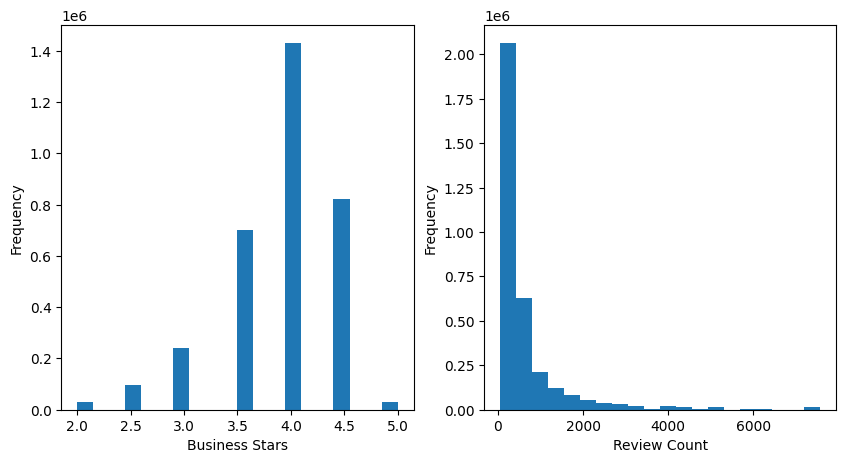

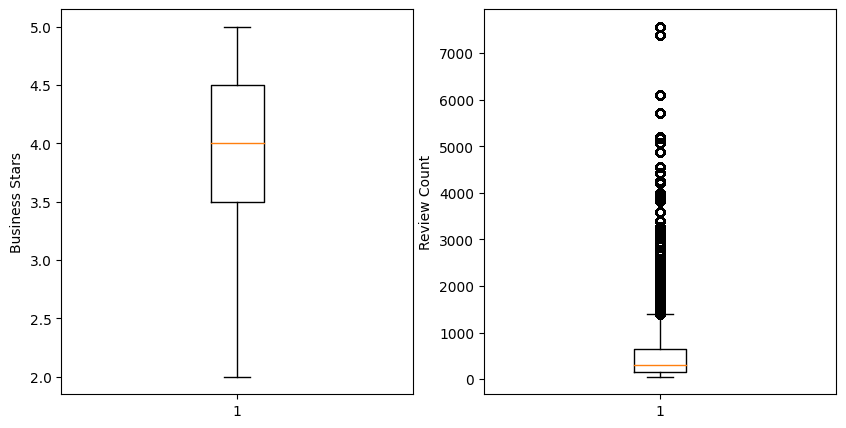

In [17]:
import matplotlib.pyplot as plt

# Create histograms for 'business_stars' and 'review_count'
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(restaurant['business_star'], bins=20)
axs[0].set_xlabel('Business Stars')
axs[0].set_ylabel('Frequency')
axs[1].hist(restaurant['review_count'], bins=20)
axs[1].set_xlabel('Review Count')
axs[1].set_ylabel('Frequency')
plt.show()

# Create boxplots for 'business_stars' and 'review_count'
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(restaurant['business_star'])
axs[0].set_ylabel('Business Stars')
axs[1].boxplot(restaurant['review_count'])
axs[1].set_ylabel('Review Count')
plt.show()


## Distrbution of Star ratings for business 

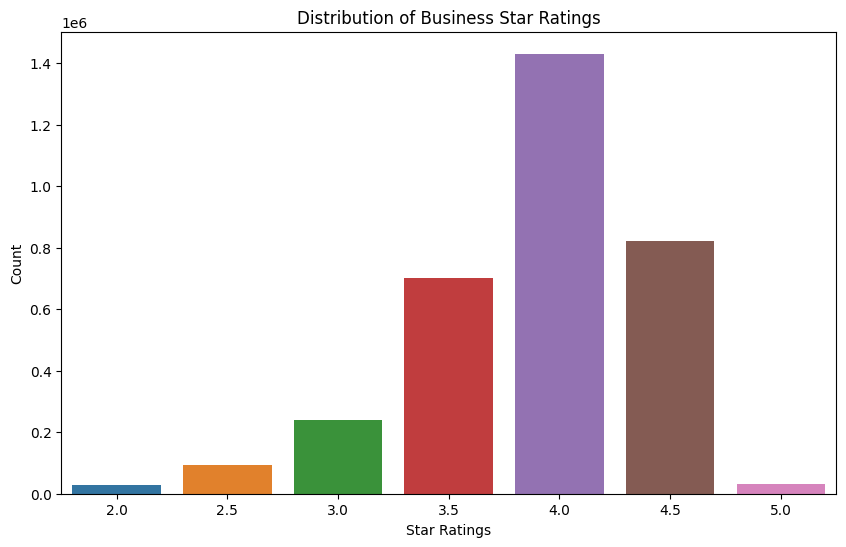

In [19]:
# Distribution of star ratings for businesses
plt.figure(figsize=(10, 6))
sns.countplot(x='business_star', data=restaurant)
plt.title('Distribution of Business Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()


## Distrbution of Star ratings for revews 


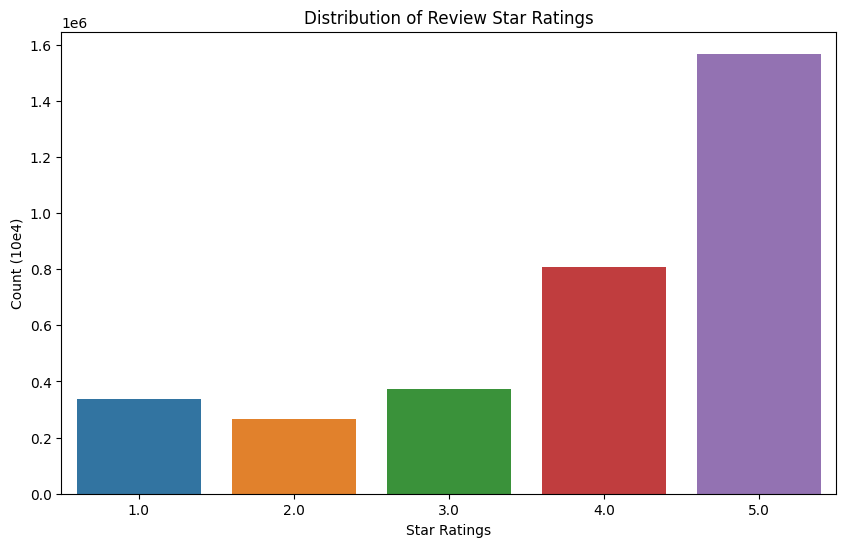

In [20]:
# Distribution of star ratings for reviews, 
plt.figure(figsize=(10, 6))
sns.countplot(x='review_star', data=restaurant)
plt.title('Distribution of Review Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count (10e4)')
plt.show()

## Distrbution of Review Sentiments 

In [24]:
preprocessed_data = pd.read_csv('../data/preprocessed_data.csv') #load data from data_preprocessing file (philly only data)

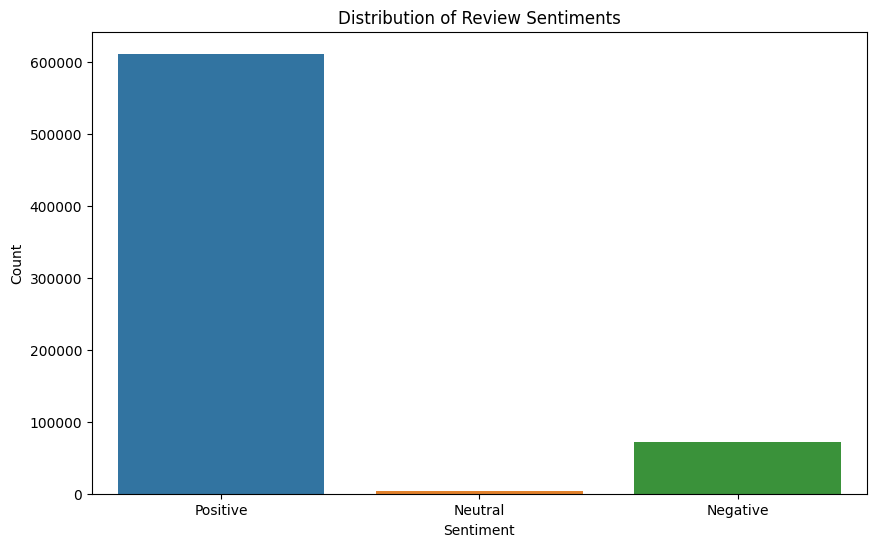

In [25]:
# Distribution of review sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=preprocessed_data, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Below; the box plot of the relationship between business star rating and review count gives us an insight into how the number of reviews a business receives is related to its star rating.

From the visualization generated by the EDA code snippet, we can observe the following:

1. Businesses with higher star ratings (4 or 5 stars) tend to have a higher number of reviews compared to businesses with lower star ratings (1 or 2 stars). This suggests that businesses with better ratings are likely to be more popular and attract more customers, resulting in more reviews.

2. The median review count tends to increase as the star rating of businesses increases. This further supports the notion that businesses with better ratings generally receive more reviews.

3. The spread of review count values is quite large for all star ratings, especially for businesses with higher ratings (4 or 5 stars). This indicates that there is a wide range of review counts within each rating category, and some businesses may receive significantly more reviews than others, even if they have similar star ratings.

4. The presence of outliers in the data, particularly for higher-rated businesses, suggests that some businesses have an exceptionally high number of reviews compared to others in the same rating category. These businesses could be very popular or have some unique attributes that make them stand out.

It's important to note that the relationship between business star rating and review count doesn't imply causation. While it's likely that better-rated businesses attract more customers and therefore receive more reviews, there may be other factors at play that influence both the star rating and the number of reviews a business receives.

## Relationship of Business Star Rating and Review Count 

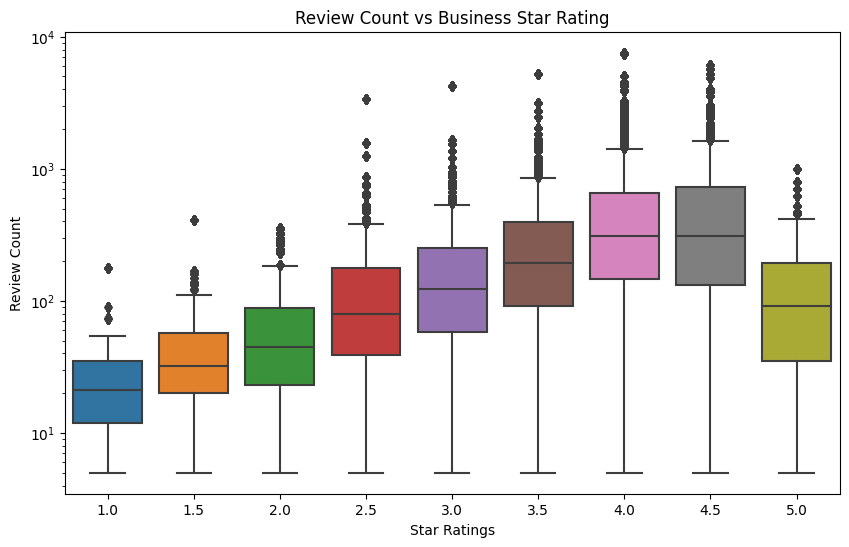

In [65]:
# Relationship between business star rating and review count
plt.figure(figsize=(10, 6))
sns.boxplot(x='business_star', y='review_count', data=restaurant)
plt.title('Review Count vs Business Star Rating')
plt.xlabel('Star Ratings')
plt.ylabel('Review Count')
plt.yscale('log')
plt.show()

Below, the box plot of the relationship between review star rating and sentiment provides insights into how the sentiment of the reviews (positive, neutral, or negative) corresponds to the star ratings given by users.

From the visualization generated by the EDA code snippet, we can observe the following:

1. Positive sentiment reviews are generally associated with higher star ratings (4 or 5 stars). This suggests that when customers have a positive experience with a business, they are more likely to leave a higher star rating.

2. Negative sentiment reviews are predominantly associated with lower star ratings (1 or 2 stars). This indicates that when customers have a negative experience with a business, they are more likely to leave a lower star rating.

3. Neutral sentiment reviews are typically associated with middle-range star ratings (3 stars). This implies that when customers have an average or mixed experience with a business, they are more likely to leave a moderate star rating.

Overall, the relationship between review star rating and sentiment highlights the correlation between the sentiment expressed in the text of a review and the star rating given by the user. This insight can be useful for businesses to understand the impact of customer sentiment on their star ratings, which in turn can affect their reputation and overall performance. By identifying areas where customers have had negative experiences, businesses can work to improve these aspects and potentially increase their overall star ratings.

## Relatioship between Review Star Rating and Sentiment 



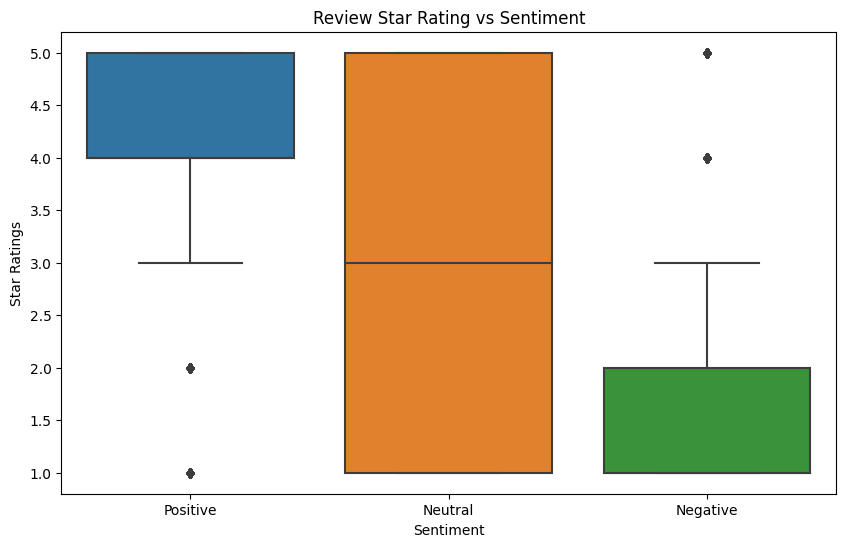

In [26]:
# Relationship between review star rating and sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='stars_review', data=preprocessed_data, order=['Positive', 'Neutral', 'Negative'])
plt.title('Review Star Rating vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Star Ratings')
plt.show()

## Correlation heat map

In [29]:
# Correlation matrix heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(preprocessed_data.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()

# Distrbution Characteristics of Data 

### Histogram of Rating 

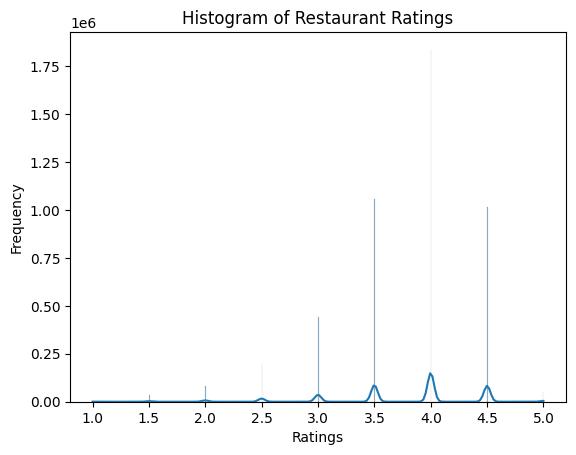

In [6]:
# Plot the histogram of business ratings
sns.histplot(data=restaurant, x='stars_x', kde=True)
plt.title('Histogram of Restaurant Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


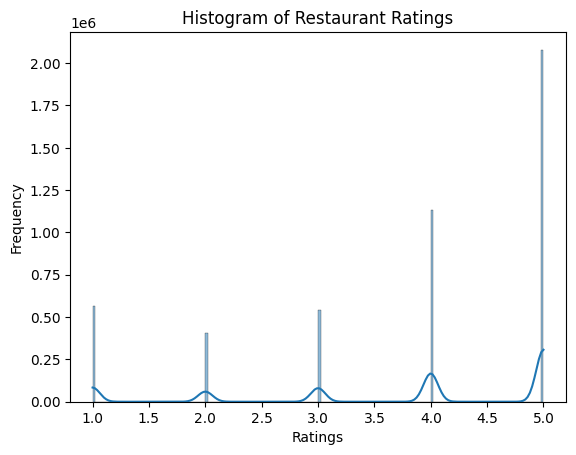

In [10]:
#histogram of review ratings 
sns.histplot(data=restaurant, x='stars_y', kde=True)
plt.title('Histogram of Review Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

### QQ plot 

A Q-Q plot is a graphical method that compares the quantiles of a dataset to the quantiles of a theoretical distribution, such as the normal distribution. By plotting the data quantiles against the theoretical quantiles, we can visually inspect how well the data follows the specified distribution.
If the data is normally distributed, the points on the Q-Q plot should approximately form a straight line with a 45-degree angle (y = x). Deviations from this straight line suggest that the data is not normally distributed. For instance, if the points form an S-shaped curve, the data might be skewed. Keep in mind that the Q-Q plot is a visual method, and the interpretation can be subjective.



QQ plot is a graphical method that compared quantiles of a dataset (breaking the data up into 4 equal parts) to the quantiles of a theoretical distbutions. By ploting the data the data quantiles against the theoretical quantiles we can see how well the data  follows a normal distbution characteized by the theoreticla quantiles 
if it is normally distbuted it sshould be a straight line at a 45 degree and angle y=x

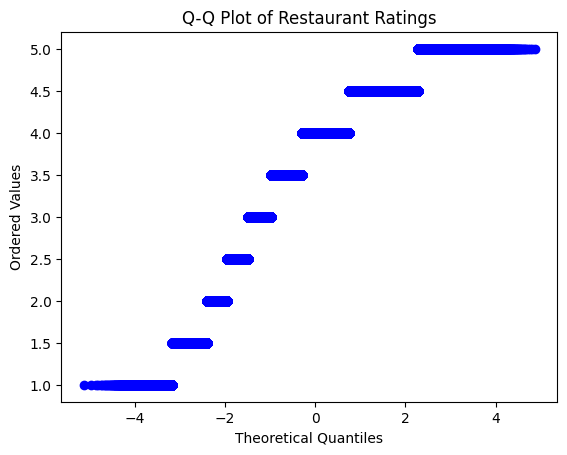

In [9]:
# Plot the Q-Q plot to check for normality
stats.probplot(restaurant['stars_x'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Restaurant Ratings')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


### Shapiro-Wilk test for normality

This test calcuates the W statitic which is the measurement of observed data and a normal distrbution. The W statitic ranges form 0 to 1 
Tells us wherther data is likely to be normally distrbuted 

the test also includes a pvalue.
the null hypthesis is the data is normamly distbuted 
the alternative hypthesis the data is not normally distbuted 
since the p-value is greater than .05, we fail to reject the null hypothesis and the data is normally disrbuted 

W = (b^2) / (a^2)

Where:

b^2 is the sum of the covariance between the ordered sample data and the corresponding expected values of the standard normal distribution.

a^2 is the sum of the squared differences between the sample data and the sample mean.

In [13]:
# Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(restaurant['stars_x'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

if shapiro_test[1] > 0.05:
    print('The data is normally distributed.')
else:
    print('The data is not normally distributed.')

Shapiro-Wilk Test Statistic: nan, p-value: 1.0
The data is normally distributed.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
# Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(restaurant['stars_y'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

if shapiro_test[1] > 0.05:
    print('The data is normally distributed.')
else:
    print('The data is not normally distributed.')

Shapiro-Wilk Test Statistic: nan, p-value: 1.0
The data is normally distributed.


## Pearsons Correlation 

We want to examine the relationship between the number of reviews and the star rating of a restaurant. You could perform Pearson's correlation test.

In [49]:
# Calculate Pearson's correlation
correlation, p_value = stats.pearsonr(restaurant['review_count'], restaurant['business_stars'])

print(f"Correlation: {correlation}, p-value: {p_value}")


Correlation: 0.19065542248659967, p-value: 0.0


# Parametric Statistical Test 

##  T-Test Between 2 Restuarant Categories 

A T-test is a statistical test that is used to compare the means of two groups. In this case, you have performed a T-test between Mexican and Thai restaurants. The T-statistic measures the difference between the means of the two groups and the p-value measures the statistical significance of that difference.

In this case, the T-statistic is -106.8218, which means that the means of the two groups (Mexican and Thai restaurants) are significantly different from each other. The negative sign indicates that the mean of the Mexican group is lower than the mean of the Thai group.

The p-value is 0.0, which means that the probability of obtaining this T-statistic by chance is very low. Therefore, we can reject the null hypothesis that there is no significant difference between the means of the two groups and conclude that there is a significant difference between the ratings of Mexican and Thai restaurants.

In [50]:
# Perform a t-test between two categories, for example, Mexican and Thai
mexican_ratings = restaurant[restaurant['categories'].str.contains("Mexican")]['business_stars']
thai_ratings = restaurant[restaurant['categories'].str.contains("Thai")]['business_stars']
t_stat, p_value = stats.ttest_ind(mexican_ratings, thai_ratings)
print(f"T-test (Mexican vs. Thai): T-statistic: {t_stat}, p-value: {p_value}")

T-test (Mexican vs. Thai): T-statistic: -106.82183326393374, p-value: 0.0


## ANOVA TEST

The ANOVA (Analysis of Variance) test is a statistical method used to compare the means of multiple groups. In the context of the Yelp restaurant dataset, it helps us determine if there is a significant difference in the average star ratings among the various restaurant categories.

When you perform the ANOVA test on the dataset, you obtain two important values: the F-statistic and the p-value. The F-statistic measures the ratio of the variation among the group means to the variation within each group. A higher F-statistic value indicates greater variability among the group means compared to the within-group variability.

The p-value, on the other hand, helps you determine the statistical significance of the test results. A small p-value (typically less than 0.05) indicates that there is a significant difference in the average star ratings among the restaurant categories. In other words, if the p-value is less than 0.05, you can reject the null hypothesis that all restaurant categories have the same average star rating. If the p-value is larger than 0.05, you cannot reject the null hypothesis, and there's not enough evidence to conclude that there's a significant difference in the average star ratings among the categories.

In summary, the ANOVA test helps you understand whether the differences in average star ratings among restaurant categories are statistically significant or if they could have occurred by chance.


 In this optimized code, we use a list comprehension to create the category_ratings list in a more concise way. We also use loc to filter the restaurant_copy DataFrame and calculate the mean star rating for each category. For the ANOVA test, we use a list comprehension to create a list of filtered star ratings for each category, and then pass this list as an argument to f_oneway() function.

### Result 

The result of the ANOVA test shows that the F-statistic is 14215.554970914056 and the p-value is 0.0. This indicates that there is a significant difference in the means of at least two restaurant categories. In other words, there is evidence to suggest that the average star rating of the different restaurant categories is not the same.

In [54]:
# List of restaurant categories
categories = [
    "Mexican", "Thai", "Seafood", "Vietnamese",
    "Barbeque", "Cajun/Creole", "Indian", "Breakfast & Brunch",
    "Steakhouses", "American", "Italian", "Pizza",
    "Japanese", "Sushi Bars", "Burgers"
]

# Filter the dataset based on the restaurant categories and calculate the average star rating
category_ratings = [(category, restaurant_copy.loc[restaurant_copy['categories'].str.contains(category), 'business_stars'].mean()) for category in categories]

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(*[restaurant_copy.loc[restaurant_copy['categories'].str.contains(category), 'business_stars'] for category in categories])
print(f"ANOVA: F-statistic: {f_stat}, p-value: {p_value}")


ANOVA: F-statistic: 14215.554970914056, p-value: 0.0


# Visual Map

In [68]:
# Filter data to only include businesses in Philadelphia
philadelphia_restaurants = restaurant_copy[restaurant_copy['city'] == 'Philadelphia']

In [73]:
philadelphia_restaurants.shape

(661626, 22)

In [74]:
import pandas as pd
import folium

# Create a map centered on Philadelphia
map_restaurants = folium.Map(location=[39.9526, -75.1652], zoom_start=12)

# Add markers to the map for each restaurant
for index, row in philadelphia_restaurants.iterrows():
    popup_text = f"{row['name']} ({row['categories']})\n{row['address']}\n{row['business_stars']} stars"
    marker = folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text)
    marker.add_to(map_restaurants)

# Display the map
map_restaurants